## CPSC 390 Fall 24 Project 2 - Genetic Algorithms
Name: Michael Morrison


**Your code starts below.  Please organized them in multiple cells with a formatted text cell before each code cell to explain the purpose of the code cell**

**PLAN**:
Single items are going to be represented as an array of 2 with the x-value in the first slot and the y-value in the second.  The crossover point will be between the two values and the mutation probability will initially be set at 20%

In [ ]:
# Crossover function
import random
def crossover(parent1, parent2):
  child = [0,0]
  child[0] = parent1[0]
  child[1] = parent2[1]
  return child

## testing
parent1 = [1,2]
parent2 = [3,4]
child = crossover(parent1, parent2)
print(child)

[1, 4]


In [ ]:
# Mutate Function
def mutate(child):
  random_number = round(random.uniform(-6, 6), 2)
  random_index = random.randint(0, 1)
  child[random_index] = random_number
  return child

## testing
child = [1,2]
child = mutate(child)
print(child)

[-4.23, 2]


In [ ]:
# select parent function
def select_parent(population, fitness):
  random_number = random.uniform(0, sum(fitness))
  total = 0
  for i in range(len(population)):
    total += fitness[i]
    if total > random_number:
      return population[i]

# testing
'''
population = [[1,2], [3,4], [5,6]]
fitness = [1,2,3]
parent = select_parent(population, fitness)
print(parent)'''

'\npopulation = [[1,2], [3,4], [5,6]]\nfitness = [1,2,3]\nparent = select_parent(population, fitness)\nprint(parent)'

In [ ]:
# Goal State
GOAL = 10.8

In [ ]:
# score evaluator
def score(child):
  score = np.sin(np.sqrt(child[0] ** 2 + child[1] ** 2))*(child[0]+child[1])
  return score

In [ ]:
# Genetic Algorithm
import math
def gen_alg(population, fitness):
  count = 0
  best_gens = []
  #the_chosen_one = [0,0]
  #chosen_score = score(the_chosen_one)
  while count < 1024:
    the_chosen_one = [0,0]
    chosen_score = score(the_chosen_one)
    count = count + 1
    new_pop = []
    for i in range(math.floor(len(population))):
      check = 0
      cnts = 0
      while check == 0: # slect most fit parents
        cnts = cnts + 1
        parent1 = select_parent(population, fitness)
        parent2 = select_parent(population, fitness)
        if parent1 != parent2: # dont lets parents breed with themselves
          check = check + 1
        if cnts > 3:
          break
      child1 = crossover(parent1, parent2) # create children
      #child2 = crossover(parent2,parent1)
      random_number = random.random()
      if random_number < 0.2: # mutation probability
        child1 = mutate(child1)
      random_number_dos = random.random()
      #if random_number_dos < 0.1: # mutation for the second child
        #child2 = mutate(child2)
      new_pop.append(child1)
      #new_pop.append(child2)
    # new population finished here

    # find the best of the new pop
    new_fit = []
    for i in new_pop:
      tmp_score = score(i)
      if tmp_score > chosen_score:
        chosen_score = tmp_score
        the_chosen_one = i
      new_fit.append(score(i))
    #population = new_pop

    # TODO: fix the chosen one ot be a new value for each generation, maybe do this after truncating the new population

    # TODO: need to truncate and determine who survives to the next genration

    indeces = sorted(range(len(new_fit)), key=lambda i: new_fit[i], reverse=True)[:10]

    tmp_pop = []
    tmp_fit = []
    for i in indeces:
      tmp_pop.append(new_pop[i])
      tmp_fit.append(new_fit[i])
    population = tmp_pop
    fitness = tmp_fit

    best_gens.append(the_chosen_one)

    if score(the_chosen_one) > GOAL:
      print('goal reached')
      print(the_chosen_one, ": ", chosen_score)
      break
    print(the_chosen_one, ": ", chosen_score)

  return the_chosen_one

In [ ]:
# create sample 1st generation
pop = []
for n in range(10):
  x = round(random.uniform(-6, 6), 2)
  y = round(random.uniform(-6, 6), 2)
  pop.append([x,y])
print(pop)

fit = []
for i in pop:
  fit.append(score(i))
print(fit)

[[-1.95, 0.93], [-4.39, 2.73], [-5.07, 2.3], [-0.77, -1.31], [4.44, -0.06], [-2.18, -4.32], [-3.53, -2.3], [-0.51, -2.36], [-0.62, -2.85], [0.91, 5.63]]
[-0.8477749070406077, 1.4894799923183535, 1.81789797562904, -2.0772682351387792, -4.218990822995517, 6.448065948980146, 5.118520407374184, -1.9077389281280488, -0.7739544947602652, -3.5847108675305313]


In [ ]:
best_gen = gen_alg(pop, fit)


[-4.39, 2.3] :  2.028280845250734
[-4.39, 2.3] :  2.028280845250734
[-4.39, 2.3] :  2.028280845250734
[-4.39, 2.3] :  2.028280845250734
[-4.39, 2.3] :  2.028280845250734
[-4.39, 2.3] :  2.028280845250734
[-4.39, 2.3] :  2.028280845250734
[1.2, -5.0] :  3.4547110149071174
[1.2, -4.96] :  3.476644931961602
[1.2, -4.96] :  3.476644931961602
[1.2, -4.96] :  3.476644931961602
[1.2, -4.96] :  3.476644931961602
[-1.19, -4.96] :  5.69200398695022
[1.2, -4.96] :  3.476644931961602
[1.2, -4.96] :  3.476644931961602
[1.2, -4.96] :  3.476644931961602
[1.2, -4.96] :  3.476644931961602
[1.2, -4.96] :  3.476644931961602
[1.2, -4.96] :  3.476644931961602
[-2.64, -4.96] :  4.685819731264914
[-2.64, -4.96] :  4.685819731264914
[-2.22, -4.26] :  6.452975922572396
[-2.22, -4.96] :  5.3896134162995
[-2.22, -4.26] :  6.452975922572396
[-2.22, -4.96] :  5.3896134162995
[-2.22, -4.26] :  6.452975922572396
[-2.22, -4.26] :  6.452975922572396
[-2.22, -4.96] :  5.3896134162995
[-2.22, -4.96] :  5.3896134162995
[

Output from algorith:  [-2.43, -4.11]


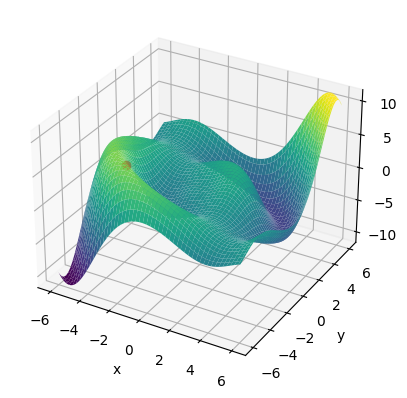

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linspace
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import signal

d = 6
x = np.linspace(-d, d, 100)
y = np.linspace(-d, d, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))*(X+Y)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(best_gen[0], best_gen[1], score(best_gen), 'ro')
#ax.invert_zaxis()
'''
for val in best_gen:
   ax.plot(val[0], val[1], score(val), 'ro')
   plt.draw()
   plt.pause(.001)'''
print("Output from algorith: ", best_gen)
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Defines the boundaries and initial parameters
population_size = 4
boundaries = (-6.0, 6.0)
generations = 1000

# Fitness Algorithm
def fitness(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))*(x+y)

x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = fitness(X, Y)

# Create a 3D surface plot of the fitness landscape
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis')])

fig.update_layout(title='Interactive 3D Surface Plot of a Function', autosize=False,
                  width=1200, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

**MODEL EVALUATION**:
The model does not perform ideally because it frequently gets stuck in a local maximum and not the absolute maximum.  The model does do a good job of gradually increasing the score but just does so towards the wrong goal

**Extra Credit - improvement ideas**

A way to improve the code would be to increase the size of each generation from 10 to 20 and to increase the mutation rate to help the model get out of the local maximums.

In [ ]:
# Improved algorithm
# Genetic Algorithm
import math
def gen_alg_2(population, fitness):
  count = 0
  best_gens = []
  #the_chosen_one = [0,0]
  #chosen_score = score(the_chosen_one)
  while count < 1024:
    the_chosen_one = [0,0]
    chosen_score = score(the_chosen_one)
    count = count + 1
    new_pop = []
    for i in range(math.floor(len(population))):
      check = 0
      cnts = 0
      while check == 0: # slect most fit parents
        cnts = cnts + 1
        parent1 = select_parent(population, fitness)
        parent2 = select_parent(population, fitness)
        if parent1 != parent2: # dont lets parents breed with themselves
          check = check + 1
        if cnts > 3:
          break
      child1 = crossover(parent1, parent2) # create children
      #child2 = crossover(parent2,parent1)
      random_number = random.random()
      if random_number < 0.35: # mutation probability
        child1 = mutate(child1)
      random_number_dos = random.random()
      #if random_number_dos < 0.1: # mutation for the second child
        #child2 = mutate(child2)
      new_pop.append(child1)
      #new_pop.append(child2)
    # new population finished here

    # find the best of the new pop
    new_fit = []
    for i in new_pop:
      tmp_score = score(i)
      if tmp_score > chosen_score:
        chosen_score = tmp_score
        the_chosen_one = i
      new_fit.append(score(i))
    #population = new_pop

    # TODO: fix the chosen one ot be a new value for each generation, maybe do this after truncating the new population

    # TODO: need to truncate and determine who survives to the next genration

    indeces = sorted(range(len(new_fit)), key=lambda i: new_fit[i], reverse=True)[:20]

    tmp_pop = []
    tmp_fit = []
    for i in indeces:
      tmp_pop.append(new_pop[i])
      tmp_fit.append(new_fit[i])
    population = tmp_pop
    fitness = tmp_fit

    best_gens.append(the_chosen_one)

    if score(the_chosen_one) > GOAL:
      print('goal reached')
      print(the_chosen_one, ": ", chosen_score)
      break
    print(the_chosen_one, ": ", chosen_score)

  return the_chosen_one

In [ ]:
gen_alg_2(pop, fit)

[-4.39, -1.77] :  6.158641376916849
[-4.39, -1.77] :  6.158641376916849
[-4.39, -1.77] :  6.158641376916849
[-4.39, -1.77] :  6.158641376916849
[-4.39, -1.77] :  6.158641376916849
[-4.39, -1.77] :  6.158641376916849
[-4.53, -1.77] :  6.22819160935004
[-4.53, -1.77] :  6.22819160935004
[-4.53, -1.77] :  6.22819160935004
[-4.53, -1.8] :  6.246990156772444
[-4.53, -1.77] :  6.22819160935004
[-4.2, -3.01] :  6.477016503363681
[-4.2, -3.01] :  6.477016503363681
[-4.2, -2.92] :  6.549826337832015
[-4.2, -2.92] :  6.549826337832015
[-4.2, -2.92] :  6.549826337832015
[-4.2, -3.01] :  6.477016503363681
[-4.2, -2.94] :  6.535759021086196
[-4.2, -3.01] :  6.477016503363681
[-4.2, -2.94] :  6.535759021086196
[-4.2, -3.01] :  6.477016503363681
[-4.53, -1.46] :  5.983364061425332
[-4.2, -2.98] :  6.504024722736567
[-4.2, -2.96] :  6.520496753458973
[-4.2, -2.96] :  6.520496753458973
[-4.2, -2.96] :  6.520496753458973
[-4.2, -2.96] :  6.520496753458973
[-4.1, -2.98] :  6.635626542920899
[-4.1, -2.96]

[-3.07, -4.27]